# Projeto 2 Ciência dos Dados Insper

## Alunos: 
* Pedro De Lucca 
* Pedro Dutra
* Fernando Mattos

## 1. Introdução
### Contexto

O Acidente Vascular Cerebral (AVC) acontece quando vasos que levam sangue ao cérebro entopem ou se rompem, provocando a paralisia na área cerebral que ficou sem circulação sanguínea. De acordo com a Organização Mundial da Saúde (OMS), o AVC corresponde a aproximadamente 11%<sup><a href="https://www.em.com.br/app/noticia/bem-viver/2022/04/18/interna_bem_viver,1360730/avc-e-a-segunda-causa-de-mortes-no-mundo-e-avanca-nos-paises-de-baixa-renda.shtml" target="_blank">[1]</a></sup> das mortes no mundo todo e, hoje, já é a principal causa de morte no Brasil ao vitimar uma média de 307 brasileiros por dia em 2022, número equivalente a quase 150%<sup><a href="https://www.uol.com.br/vivabem/noticias/redacao/2022/10/29/cresce-numero-de-brasileiros-mortos-por-acidente-vascular-cerebral.htm" target="_blank">[2]</a></sup> dos óbitos por covid-19 nesse mesmo período. Por isso, o intuito deste projeto é entender qual perfil é mais propenso a sofrer um acidente como esse, tendo como base um dataset composto por:

1. `id`: Número único de identificação.
1. `gender`: Gênero
    1. `Male`: Masculino;
    1. `Female`: Feminino;
    1. `Other`: Outro.
1. `age`: Idade.
1. `hypertension`: Hipertensão
    1. `0`: Pacientes sem hipertensão;
    1. `1`: Pacientes hipertensos.
1. `heart_disease`: Doenças cardiovascuares
    1. `0`: Pacientes sem doenças cardiovasculares;
    1. `1`: Pacientes cardíacos.
1. `ever_married`: Casado
    1. `No`: Nunca foi casado;
    1. `Yes`: É ou já foi casado.
1. `work_type`: Tipo de ocupação 
    1. `children`: Criança;
    1. `Govt_jov`: Funcionário público;
    1. `Never_worked`: Nunca trabalhou;
    1. `Private`: Empresa privada;
    1. `Self-employed`: Empreendedor.
1. `Residence_type`: Local de rediência
    1. `Rural`: Rural;
    1. `Urban` Urbano.
1. `avg_glucose_level`: Média do nível de glicose no sangue.
1. `bmi`: Índice de massa corporal.
1. `smoking_status`: Relação com o cigarro
    1. `formerly smoked`: Já fumou;
    1. `never smoked`: Nunca fumou;
    1. `smokes`: Fumante;
    1. `Unknown`: Não se tem informação.
1. `stroke`: AVC
    1. `0`: Pacientes que nunca tiveram AVC;
    1. `1`: Pacientes que já tiveram AVC.


### Pergunta Principal

Quais os aspectos mais relevantes para identificar pessoas propensas a sofrer um AVC?

## Importando Bibliotecas Básicas

In [286]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

## Limpeza dos Dados

Antes de iniciarmos a análise, iremos excluir e separar informações da base de dados original para garantir um trabalho limpo e eficaz. Para isso, retiraremos a coluna `id`, irrelevante para o tema abordado, e vamos dividir nosso dataset entre aqueles que já tiveram e aqueles que nunca tiveram AVC, identificando a porcentagem de cada uma dessas divisões em relação ao todo.

In [287]:
dados=pd.read_csv('healthcare-dataset-stroke-data.csv')

dados.dropna(inplace=True)
dados=dados.drop(columns=['id'])

dados.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [288]:
avc_sim=dados['stroke']==1
avc_nao=dados['stroke']==0
dados_avc_sim=dados[avc_sim]
dados_avc_nao=dados[avc_nao]

avc=dados.loc[:,'stroke'].value_counts(True)
avc

0    0.957425
1    0.042575
Name: stroke, dtype: float64

## Análise Exploratória

Nesta etapa, analisaremos os dados de cada seção (`dados_avc_sim` e `dados_avc_nao`) a fim de selecionar as informações que mais se relacionam com o AVC. Comparar ambos os datasets em relação às suas colunas nos permitirá estabelecer relevâncias detro de cada tópico.

### É ou já foi casado

In [289]:
# Com AVC
casado_avc_sim = dados_avc_sim['ever_married'].value_counts(True)
casado_avc_sim

Yes    0.889952
No     0.110048
Name: ever_married, dtype: float64

In [290]:
# Sem AVC
casado_avc_nao = dados_avc_nao['ever_married'].value_counts(True)
casado_avc_nao

Yes    0.642128
No     0.357872
Name: ever_married, dtype: float64

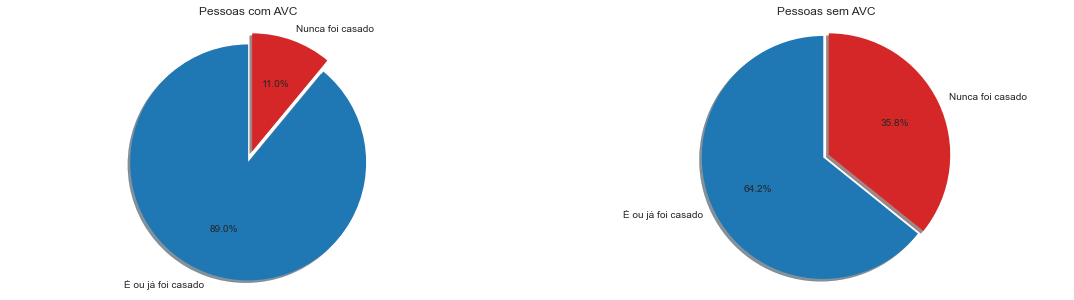

In [399]:
plt.figure(figsize=(19,5))
labels='É ou já foi casado', 'Nunca foi casado'
explode1=(0,0.1)
explode2=(0,0.05)
plt.subplot(121)
plt.pie(casado_avc_sim, labels=labels, explode=explode1, colors=['tab:blue', 'tab:red'], autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Pessoas com AVC')
plt.axis('equal')

plt.subplot(122)
plt.pie(casado_avc_nao, labels=labels,explode=explode2, colors=['tab:blue', 'tab:red'], autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Pessoas sem AVC')
plt.axis('equal')
plt.show()

### Local de residência

In [292]:
# Com AVC
residencia_avc_sim = dados_avc_sim['Residence_type'].value_counts(True)
residencia_avc_sim

Urban    0.521531
Rural    0.478469
Name: Residence_type, dtype: float64

In [293]:
# Sem AVC
residencia_avc_nao = dados_avc_nao['Residence_type'].value_counts(True)
residencia_avc_nao

Urban    0.506596
Rural    0.493404
Name: Residence_type, dtype: float64

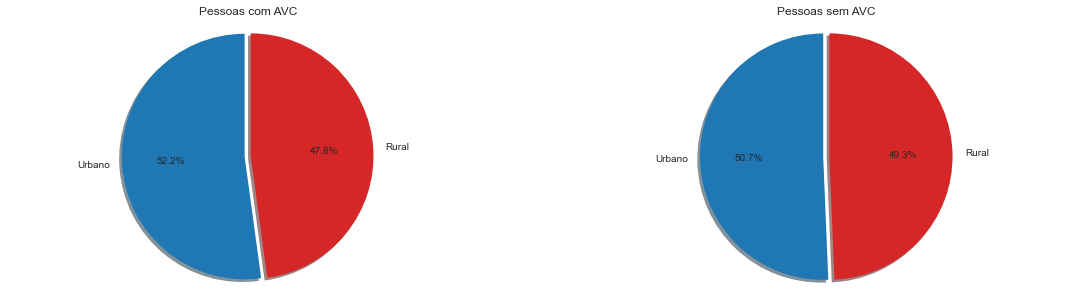

In [398]:
plt.figure(figsize=(19,5))
labels='Urbano', 'Rural'
explode1=(0,0.05)
explode2=(0,0.05)
plt.subplot(121)
plt.pie(residencia_avc_sim, labels=labels, explode=explode1, colors=['tab:blue', 'tab:red'], autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Pessoas com AVC')
plt.axis('equal')

plt.subplot(122)
plt.pie(residencia_avc_nao, labels=labels,explode=explode2, colors=['tab:blue', 'tab:red'], autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Pessoas sem AVC')
plt.axis('equal')
plt.show()

### Ocupação

In [295]:
# Com AVC 
work_type_avc_sim = dados_avc_sim['work_type'].value_counts(True)
work_type_avc_sim

Private          0.607656
Self-employed    0.253589
Govt_job         0.133971
children         0.004785
Name: work_type, dtype: float64

In [296]:
# Sem AVC
work_type_avc_nao = dados_avc_nao['work_type'].value_counts(True)
work_type_avc_nao

Private          0.571064
Self-employed    0.153617
children         0.142553
Govt_job         0.128085
Never_worked     0.004681
Name: work_type, dtype: float64

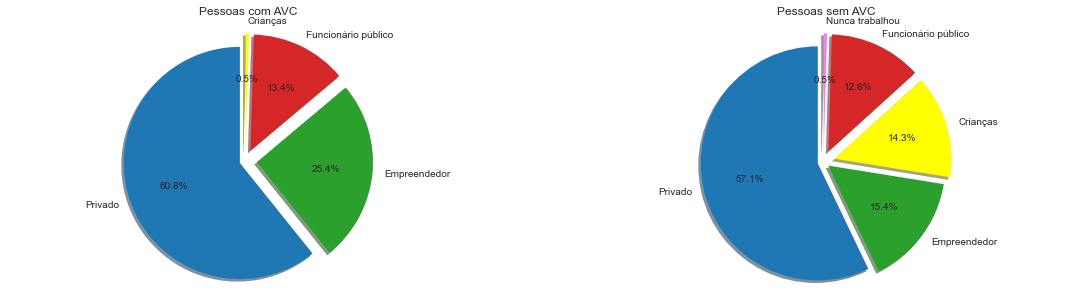

In [396]:
plt.figure(figsize=(19,5))
labels1='Privado','Empreendedor','Funcionário público','Crianças'
labels2='Privado','Empreendedor','Crianças','Funcionário público','Nunca trabalhou'
explode1=(0.05,0.1,0.1,0.1)
explode2=(0.05,0.05,0.1,0.1,0.1)
plt.subplot(121)
plt.pie(work_type_avc_sim, labels=labels1, explode=explode1, colors=['tab:blue', 'tab:green','tab:red','yellow'], autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Pessoas com AVC')
plt.axis('equal')

plt.subplot(122)
plt.pie(work_type_avc_nao, labels=labels2,explode=explode2, colors=['tab:blue', 'tab:green','yellow','tab:red','violet'], autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Pessoas sem AVC')
plt.axis('equal')
plt.show()

### Doenças cardiovsculares

In [298]:
# Com AVC
doenca_coracao_avc_sim=dados_avc_sim['heart_disease'].value_counts(True)
doenca_coracao_avc_sim


0    0.808612
1    0.191388
Name: heart_disease, dtype: float64

In [299]:
# Sem AVC
doenca_coracao_avc_nao=dados_avc_nao['heart_disease'].value_counts(True)
doenca_coracao_avc_nao

0    0.956809
1    0.043191
Name: heart_disease, dtype: float64

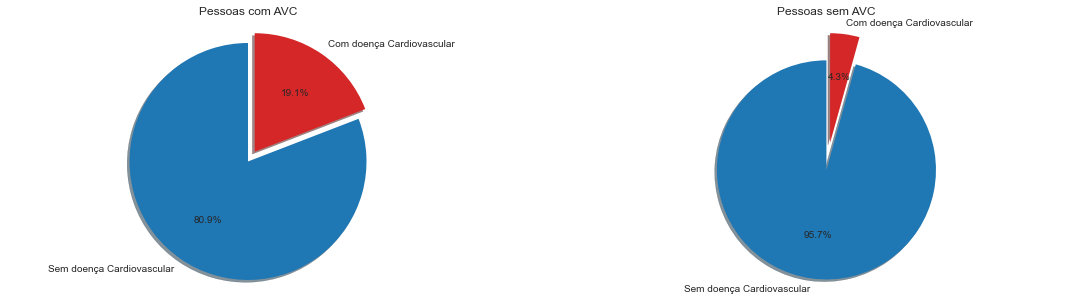

In [373]:
plt.figure(figsize=(19,5))
labels='Sem doença Cardiovascular', 'Com doença Cardiovascular'
explode1=(0.05,0.05)
explode2=(0.05,0.2)
plt.subplot(121)
plt.pie(doenca_coracao_avc_sim, labels=labels, explode=explode1, colors=['tab:blue', 'tab:red'], autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Pessoas com AVC')
plt.axis('equal')

plt.subplot(122)
plt.pie(doenca_coracao_avc_nao, labels=labels,explode=explode2, colors=['tab:blue', 'tab:red'], autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Pessoas sem AVC')
plt.axis('equal')
plt.show()

### Hipertensão

In [301]:
# Com AVC
hip_avc_sim=dados_avc_sim['hypertension'].value_counts(True)
hip_avc_sim

0    0.712919
1    0.287081
Name: hypertension, dtype: float64

In [302]:
# Sem AVC
hip_avc_nao=dados_avc_nao['hypertension'].value_counts(True)
hip_avc_nao

0    0.916809
1    0.083191
Name: hypertension, dtype: float64

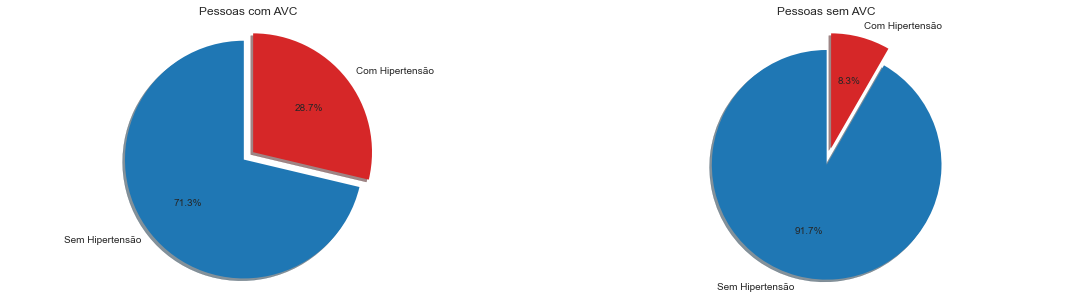

In [375]:
plt.figure(figsize=(19,5))
labels='Sem Hipertensão', 'Com Hipertensão'
explode1=(0.05,0.05)
explode2=(0.05,0.1)
plt.subplot(121)
plt.pie(hip_avc_sim, labels=labels, explode=explode1, colors=['tab:blue', 'tab:red'], autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Pessoas com AVC')
plt.axis('equal')

plt.subplot(122)
plt.pie(hip_avc_nao, labels=labels,explode=explode2, colors=['tab:blue', 'tab:red'], autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Pessoas sem AVC')
plt.axis('equal')
plt.show()

### Fumante

In [304]:
# Com AVC
fumo_avc_sim=dados_avc_sim['smoking_status'].value_counts(True)
fumo_avc_sim

never smoked       0.401914
formerly smoked    0.272727
smokes             0.186603
Unknown            0.138756
Name: smoking_status, dtype: float64

In [305]:
# Sem AVC
fumo_avc_nao=dados_avc_nao['smoking_status'].value_counts(True)
fumo_avc_nao

never smoked       0.376170
Unknown            0.309362
formerly smoked    0.165957
smokes             0.148511
Name: smoking_status, dtype: float64

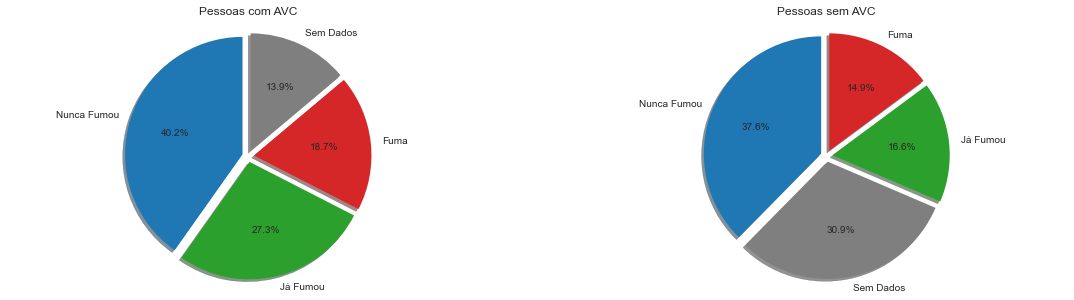

In [368]:
plt.figure(figsize=(19,5))
labels1='Nunca Fumou', 'Já Fumou', 'Fuma', 'Sem Dados'
labels2='Nunca Fumou', 'Sem Dados', 'Já Fumou', 'Fuma'
explode1=(0.05,0.05,0.05,0.05)
explode2=(0.05,0.05,0.05,0.05)
plt.subplot(121)
plt.pie(fumo_avc_sim, labels=labels1, explode=explode1, colors=['tab:blue', 'tab:green','tab:red','tab:gray'], autopct='%1.1f%%', shadow=True,
startangle=90)
plt.title('Pessoas com AVC')
plt.axis('equal')

plt.subplot(122)
plt.pie(fumo_avc_nao, labels=labels2, explode=explode2,colors=['tab:blue', 'tab:gray','tab:green','tab:red'], autopct='%1.1f%%', shadow=True, 
startangle=90)
plt.title('Pessoas sem AVC')
plt.axis('equal')
plt.show()

### Gênero

In [387]:
gen_avc_sim=dados_avc_sim['gender'].value_counts(True)
gen_avc_sim

Female    0.574163
Male      0.425837
Name: gender, dtype: float64

In [386]:
gen_avc_nao=dados_avc_nao['gender'].value_counts(True)
gen_avc_nao

Female    0.590851
Male      0.408936
Other     0.000213
Name: gender, dtype: float64

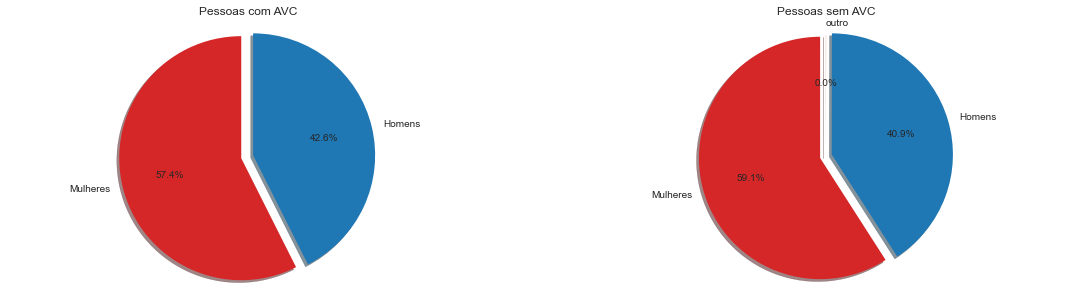

In [401]:
labels1='Mulheres', 'Homens'
labels2 = 'Mulheres', 'Homens','outro'
plt.figure(figsize=(19,5))

plt.subplot(121)
plt.pie(gen_avc_sim, labels=labels1, explode=(0.05,0.05), colors=['tab:red', 'tab:blue'], autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Pessoas com AVC')
plt.axis('equal')

plt.subplot(122)
plt.pie(gen_avc_nao, labels=labels2, explode=(0.05,0.05,0), colors=['tab:red', 'tab:blue'], autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Pessoas sem AVC')
plt.axis('equal')

plt.show()

### Idade

In [309]:
dados['age'].describe()

count    4909.000000
mean       42.865374
std        22.555115
min         0.080000
25%        25.000000
50%        44.000000
75%        60.000000
max        82.000000
Name: age, dtype: float64

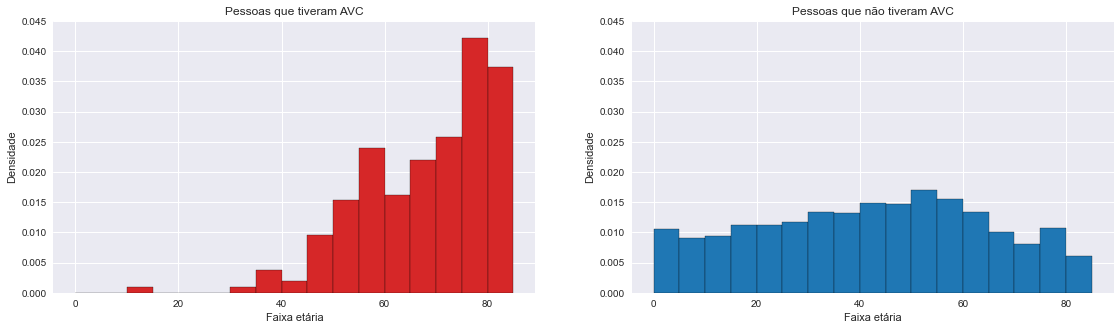

In [402]:
plt.figure(figsize=(19,5))

idade = np.arange(0,90,5)

plt.subplot(121)
plt.hist(dados_avc_sim['age'], bins = idade, edgecolor='black',density=True, color='tab:red')
plt.title('Pessoas que tiveram AVC')
plt.xlabel('Faixa etária')
plt.ylabel('Densidade')
plt.ylim(0,0.045)

plt.subplot(122)
plt.hist(dados_avc_nao['age'], bins = idade, edgecolor='black',density=True, color='tab:blue')
plt.title('Pessoas que não tiveram AVC')
plt.xlabel('Faixa etária')
plt.ylabel('Densidade')
plt.ylim(0,0.045)

plt.show()

### Nível de glicose no sangue

In [311]:
dados['avg_glucose_level'].describe()

count    4909.000000
mean      105.305150
std        44.424341
min        55.120000
25%        77.070000
50%        91.680000
75%       113.570000
max       271.740000
Name: avg_glucose_level, dtype: float64

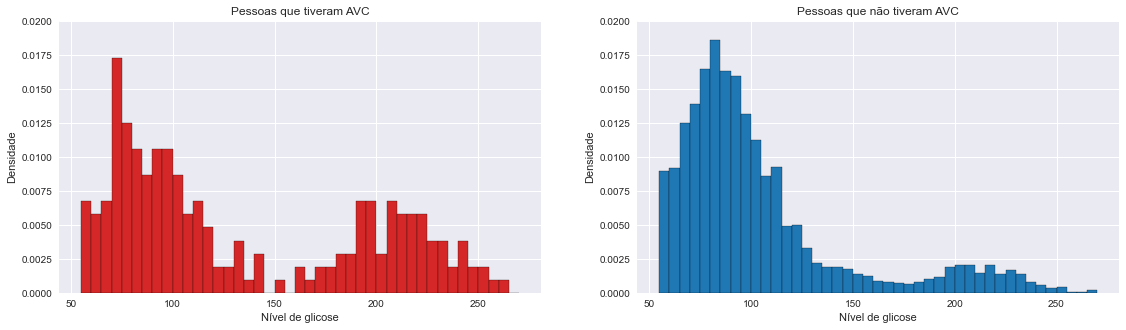

In [403]:
plt.figure(figsize=(19,5))

glicose = np.arange(55,275,5)

plt.subplot(121)
plt.hist(dados_avc_sim['avg_glucose_level'], bins = glicose, edgecolor='black',density=True, color='tab:red')
plt.title('Pessoas que tiveram AVC')
plt.xlabel('Nível de glicose')
plt.ylabel('Densidade')
plt.ylim(0,0.02)

plt.subplot(122)
plt.hist(dados_avc_nao['avg_glucose_level'], bins = glicose, edgecolor='black',density=True, color='tab:blue')
plt.title('Pessoas que não tiveram AVC')
plt.xlabel('Nível de glicose')
plt.ylabel('Densidade')
plt.ylim(0,0.02)
plt.show()

### Índice de massa Corporal

In [313]:
dados['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

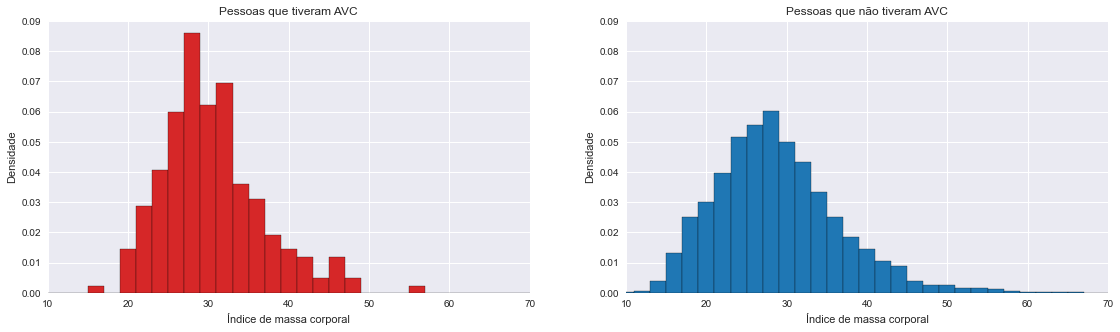

In [404]:
plt.figure(figsize=(19,5))

masssa_corporal = np.arange(5,105,2)

plt.subplot(121)
plt.hist(dados_avc_sim['bmi'], bins = masssa_corporal, edgecolor='black',density=True, color='tab:red')
plt.title('Pessoas que tiveram AVC')
plt.xlabel('Índice de massa corporal')
plt.ylabel('Densidade')
plt.ylim(0,0.09)
plt.xlim(10,70) # Desconsideramos os outliers das extremidades

plt.subplot(122)
plt.hist(dados_avc_nao['bmi'], bins = masssa_corporal, edgecolor='black',density=True, color='tab:blue')
plt.title('Pessoas que não tiveram AVC')
plt.xlabel('Índice de massa corporal')
plt.ylabel('Densidade')
plt.ylim(0,0.09)
plt.xlim(10,70) # Desconsideramos os outliers das extremidades
plt.show()

#### Outliers Massa corporal

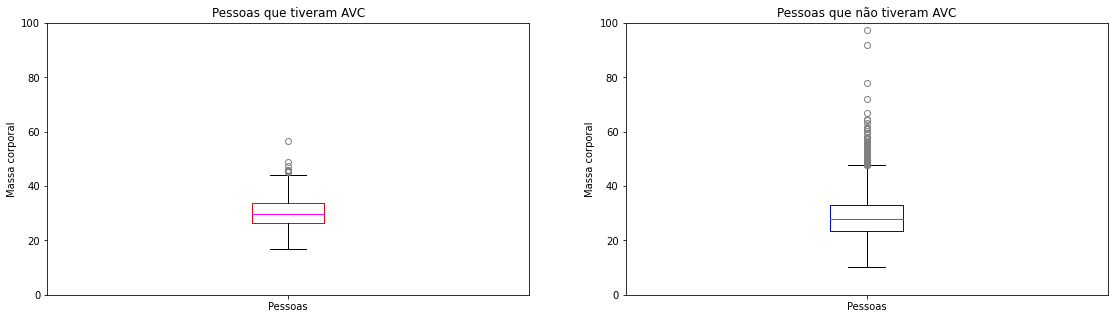

In [315]:
plt.figure(figsize=(19,5))

plt.subplot(121)
plt.boxplot(dados_avc_sim.bmi, labels = ['Pessoas'],  
            boxprops=dict(color='red'),
            medianprops=dict(color='magenta'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='grey')
            )
plt.title('Pessoas que tiveram AVC')
plt.ylabel('Massa corporal')
plt.ylim(0,100)

plt.subplot(122)
plt.boxplot(dados_avc_nao.bmi, labels = ['Pessoas'],  
            boxprops=dict(color='blue'),
            medianprops=dict(color='magenta'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='grey')
            )
plt.title('Pessoas que não tiveram AVC')
plt.ylabel('Massa corporal')
plt.ylim(0,100)

plt.show()

# não foram considerado os outliers depois de massa corporal igual a 70 para a implementação do histograma.

### Conclusão da Análise Exploratória

Feita a Análise Exploratória para cada coluna do nosso dataset, podemos identificar como cada categoria influencia no perfil de uma pessoa com AVC. Dessa forma, podemos concluir que:
* `Casado`: Cerca de 88% das pessoas que tiveram AVC eram casadas, o que evidencia que o fato de uma pessoa ser ou já ter sido casada aumenta a chance de esta ter um AVC.
* `Local de residência`: Como em ambos os gráficos as variáveis ficaram praticamente igualmente distribuídas (50/50), pode-se afirmar que o local de residência não influencia na ocorrência de AVC, podendo então ser descartado.
* `Ocupação`: Assim como no local de residência, as porcentagens são muito parecidas em ambos os gráficos. A única grande diferença é em relação a porcentagem de crianças que quase não aparece no dataset de pessoas com AVC. Entretanto isso ficará mais claro quando discutirmos sobre a idade das pessoas. Dessa forma, a categoria ocupação também pode ser descartada.
* `Doenças cardiovasculares`: O número de pessoas com doenças/problemas no coração que tiveram AVC tem uma grande diferença em relação as pessoas que nunca tiveram AVC (cerca de 15%), o que mostra que essa categoria tem uma certa relevância e impacto em relação a ocorrência de AVC.
* `Hipertensão`: Com uma diferença de mais de 20% em relação a ocorrência de hipertensão em pessoas que já e nunca tiveram AVC, pode-se afirmar que esse quesito tem sua relevância para um perfil de pessoa mais propensa a sofrer um AVC. 
* `Fumante`: Em relação as pessoas que fumam ou já fumaram, pode-se perceber um aumento de 10% nas pessoa que nunca tiveram AVC e pessoas que já tiveram. Entretanto, não é possível afirmar uma relevância a essa categoria devido ao seu alto número de dados sem classificação (cerca de um terço do total) e, por isso, ser fumante passa a ser descartado para o nosso perfil.
* `Gênero`: Como não houve uma diferença significativa entre as porcentagens em ambos os gráficos, podemos então assumir que o gênero não impacta na probabilidade de uma pessoa sofrer AVC e, por isso, será descartado.
* `Idade`:  A partir dos histogramas feitos, pode-se afirmar que as idades estão bem distríbuidas entre aqueles que não sofreram AVC e em relação aos que já tiveram AVC, nota-se que há uma ocorrência maior de casos em mais velhos, em que a média fica em torno dos 70 anos. Dessa forma, entende-se que pessoas mais velhas tendem a ter uma chance maior de sofrer AVC. Dito isso, para o nosso perfil de pessoa propensa a sofrer AVC, a idade será de grande importância para determinar isso. 
* `Nível de glicose no sangue`: É possível perceber uma diferença entre aqueles que já e nunca sofreram AVC a partir de um nível de glicose entre 150 e 275, em que fica perceptível uma quantidade maior de glicose no sangue em relação as pessoas que já sofreram AVC.
* `Índice de massa corporal`: Como ambos os histogramas seguem uma distribuição parecida em relação a massa corporal das pessoas, pode-se afirmar que esta não possui um grande impacto em relação a ocorrência de um AVC (ficará mais evidente após a matriz de correlação ser feita).

## Montando o Algoritmo

Ao repartirmos a base de dados notamos que, no dataset original, a diferença da quantidade de pessoas que nunca sofreram com AVC em relação às que já enfrentaram esse acidente é de quase 96%. Apesar de significativa, essa diferença não impactou nossas análises até o momento, visto que, quanto maior uma base de dados, mais próxima ela estará de representar uma população, ou seja, numa análise exploratória pouco importa a diferença entre bases desde que todas sejam suficientemente grandes para que não representem casos específicos. Entretanto, a construção de modelos machine-learning satisfatórios exige um dataset cujos dados da informação alvo (target) estejam simetricamente distribuidos entre todos os valores possíveis, pois, caso contrário, os resultados apresentarão padrões enviesados. Assim, para elaborarmos um modelo que contribua para a resposta do tema proposto, precisamos utilizar uma base de dados que contenha a mesma quantidade de pacientes que já tiveram e que nunca tiveram AVC. Mas, dispondo de uma base maior de pacientes sem históricos de AVC, com qual critério selecionaremos aqueles que serão incluídos na nossa base? Tendo `dados_avc_nao` em ordem aleatória, faremos um loop que percorre, de 200 em 200 linhas, essa base de dados e concatena-as com as 209 linhas de `dados_avc_sim` para formar um dataset base no início de cada etapa. As etapas seguem com a aplicação do algorítimo própriamente dito antes que o loop se reinicie ou termine. Por fim, a média das análises feitas no loop nos permitirá tirar conclusões sobre os modelos implementados.

Para todas as técnicas de modelagem escolhidas, é necessário que separemos o dataset base em duas bases de dado: `teste` e `treino`. Enquanto a primeira fornece as informações da coluna `stroke` a fim de permitir ao algorítimo avaliar pelos demais dados quais os critérios determinantes para que uma pessoa já tenha sofrido com um AVC, a segunda deixa essa mesma coluna em branco e, assim, nos fornece a acurácia do modelo a partir das classificações que o próprio algorítimo faz em `stroke` de `treino`. Em palavras simples, o algorítimo usa `teste` para aprender o "porquê" de alguém já ter sofrido com AVC e aplica o que aprendeu em `treino` ao analisar uma pessoa e apontar se ela já sofreu com AVC ou não.

### Decision Tree 

Uma "decision Tree"<sup><a href= "https://www.lucidchart.com/pages/pt/o-que-e-arvore-de-decisao" target="_blank">[3]</a></sup> é semelhante a um fluxograma, mas fazendo analogia a uma árvore, em que consiste na criação de vários pontos de decisão. Esses pontos serão vistos como os nós dos ramos da árvore entre um galho e outro, em que geralmente começa com um único nó, que se divide em possíveis resultados. Assim, cada um desses resultados leva a nós adicionais, que se ramificam em outras possibilidades, formando então uma árvore. Dessa forma, em cada nó sempre haverá dois caminhos a serem seguidos, ou seja, a partir da questão posta, há sempre duas opções de resposta, em que tal processo se repete até chegar em um resultado.

Além disso, é importante ter em mente que, por conta dessas diversas possibilidades de caminhos a serem seguidos por uma "decision tree", diferentes árvores de decisão conseguem chegar no mesmo resultado, isto é, um único problema pode possuir diversas "decision trees".

Esclarecido isso, a nossa árvore de decisão para o problema em questão será feita da seguinte maneira:



In [316]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [317]:
lista_acuracias_dt=[]
for i in range(0,4700,200):
    dados_avc_nao_200=dados_avc_nao.iloc[i:i+200]
    dados_juntos=pd.concat([dados_avc_nao_200, dados_avc_sim])

    # Separando as Features Mais relevantes
    features=['age','hypertension', 'heart_disease','avg_glucose_level','bmi']
    X=dados_juntos[features]
    y=dados_juntos.stroke

    # Separando entre treino e Teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    # Definimos a profundidade máxima da árvore como 5
    clf=DecisionTreeClassifier(max_depth=5)
    clf=clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)

    # Acurácia
    acuracia=metrics.accuracy_score(y_test, y_pred)
    lista_acuracias_dt.append(acuracia)
print(f'Acurácia MÉDIA: {np.mean(lista_acuracias_dt)}')

Acurácia MÉDIA: 0.7102487291212781


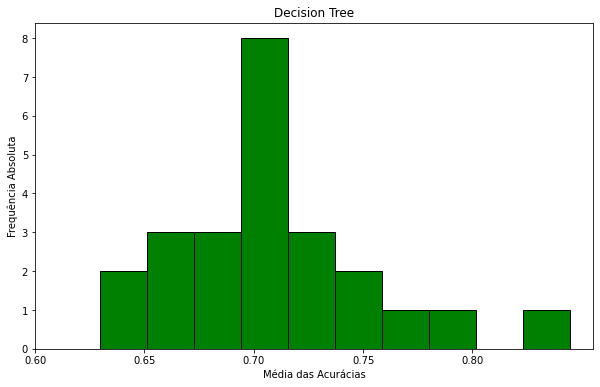

In [318]:
x_ticks=np.arange(0.6,0.85, 0.05)
plt.figure(figsize=(10,6))
plt.hist(lista_acuracias_dt, bins=10, density=False, edgecolor='black', color='green')
plt.xticks(x_ticks)
plt.ylabel('Frequência Absoluta')
plt.xlabel('Média das Acurácias')
plt.title('Decision Tree')
plt.show()

### Random Forest

O "random forest"<sup><a href="https://didatica.tech/o-que-e-e-como-funciona-o-algoritmo-randomforest/" target="_blank">[4]</a></sup>, assim como a "decision tree", é um algoritmo de machine learning usado para realizar predições, em que ele busca criar de forma aleatória várias árvores de decisão e combinar as apurações de todas elas para chegar então a um resultado final. Por isso o nome "random forest" (floresta aleatória), ou seja, trata-se de uma combinação de árvores de decisão independentes entre si.

Uma vantagem de se utilizar um algoritmo como esse é o fato de que, além ser muito poderoso, ele retorna de maneira muito compreensiva a importância atribuída para cada variável independente na hora de realizar predições. Dessa maneira, é possível medir o impacto de cada questão no resultado final por exemplo. 

In [319]:
from sklearn.ensemble import RandomForestClassifier

In [335]:
lista_acuracias_rf=[]
for i in range(0,4700,200):
    dados_avc_nao_200=dados_avc_nao.iloc[i:i+200]
    dados_juntos=pd.concat([dados_avc_nao_200, dados_avc_sim])

    # Separando as Features Mais relevantes
    features=['age','hypertension', 'heart_disease','avg_glucose_level','bmi']
    X=dados_juntos[features]
    y=dados_juntos.stroke

    # Separando entre treino e Teste
    X_train, X_test, y_train, y_test_rf = train_test_split(X, y, test_size=0.33, random_state=42)

    # Definimos o números de árvores como 300
    clf_rf=RandomForestClassifier(n_estimators=300, random_state=0)
    clf_rf=clf_rf.fit(X_train, y_train)
    y_pred_rf=clf_rf.predict(X_test)

    # Acurácia
    acuracia=metrics.accuracy_score(y_test_rf, y_pred_rf)
    lista_acuracias_rf.append(acuracia)
print(f'Acurácia MÉDIA: {np.mean(lista_acuracias_rf)}')

Acurácia MÉDIA: 0.7480029048656499


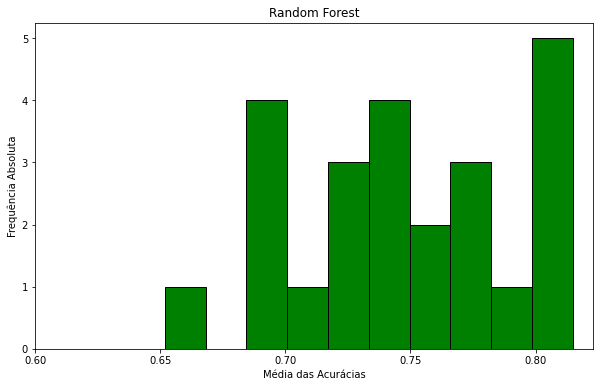

In [336]:
plt.figure(figsize=(10,6))
plt.hist(lista_acuracias_rf, bins=10, density=False, edgecolor='black', color='green')
plt.xticks(x_ticks)
plt.ylabel('Frequência Absoluta')
plt.xlabel('Média das Acurácias')
plt.title('Random Forest')
plt.show()

## KNN

K-nearest neighbors<sup><a href="https://www.digitalocean.com/community/tutorials/k-nearest-neighbors-knn-in-python" target="_blank">[5]</a></sup>, mais conhecido como "KNN" é uma técnica de aprendizado de máquina supervisionado que pode ser usada para lidar com tarefas de classificação e regressão. É possível pensar o KNN como um algoritimo que se origina da vida real e tende a ser impactado pelas pessoas ao seu redor.

O classificador KNN identifica a classe de um ponto de dados usando o princípio de votação por maioria. Se k for definido como 5, as classes dos 5 pontos mais próximos são examinadas. A previsão é feita de acordo com a classe predominante. O método KNN não depende de nenhum modelo interno de aprendizado de máquina para gerar previsões. Ele é um método de classificação que simplesmente precisa saber quantas categorias existem para trabalhar (uma ou mais). Isso significa que ele pode avaliar rapidamente se uma nova categoria deve ou não ser adicionada sem precisar saber quantas outras existem.

Entretanto, a desvantagem disso é que esta técnica não pode antecipar coisas incomuns. Assim, embora o KNN alcance alta precisão no conjunto de teste, é mais lento e mais caro em termos de tempo e memória. Ele precisa de uma quantidade considerável de memória para armazenar todo o conjunto de dados de treinamento para previsão. Por isso, devemos ter em mente que o KNN não é ideal para conjuntos de dados de grandes dimensões.


In [337]:
from sklearn.neighbors import KNeighborsClassifier

In [360]:
lista_acuracias_knn1=[]
lista_acuracias_knn5=[]
for i in range(0,4700,200):
    dados_avc_nao_200=dados_avc_nao.iloc[i:i+200]
    dados_juntos=pd.concat([dados_avc_nao_200, dados_avc_sim])

    # Separando as Features Mais relevantes
    features=['age','hypertension', 'heart_disease','avg_glucose_level','bmi']
    X=dados_juntos[features]
    y=dados_juntos.stroke

    # Separando entre treino e Teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    #Aplicando o método KNN
    knn5 = KNeighborsClassifier(n_neighbors = 5)
    knn1 = KNeighborsClassifier(n_neighbors=1)

    knn5.fit(X_train, y_train)
    knn1.fit(X_train, y_train)

    y_pred_5 = knn5.predict(X_test)
    y_pred_1 = knn1.predict(X_test)

    # Acurácia
    acuracia1=metrics.accuracy_score(y_test, y_pred_1)
    acuracia5=metrics.accuracy_score(y_test, y_pred_5)
    lista_acuracias_knn1.append(acuracia1)
    lista_acuracias_knn5.append(acuracia1)
print(f'Acurácia MÉDIA knn1: {np.mean(lista_acuracias_knn1)}')
print(f'Acurácia MÉDIA knn5: {np.mean(lista_acuracias_knn5)}')

Acurácia MÉDIA knn1: 0.7022240377632535
Acurácia MÉDIA knn5: 0.7022240377632535


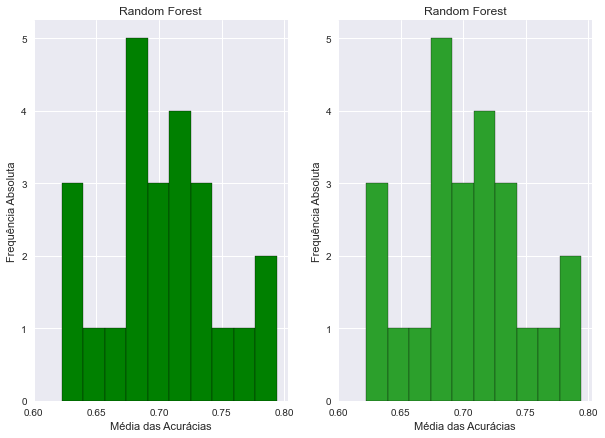

In [361]:
plt.figure(figsize=(10,7))

plt.subplot(121)
plt.hist(lista_acuracias_knn1, bins=10, density=False, edgecolor='black', color='green')
plt.xticks(x_ticks)
plt.ylabel('Frequência Absoluta')
plt.xlabel('Média das Acurácias')
plt.title('Random Forest')

plt.subplot(122)
plt.hist(lista_acuracias_knn5, bins=10, density=False, edgecolor='black', color='tab:green')
plt.xticks(x_ticks)
plt.ylabel('Frequência Absoluta')
plt.xlabel('Média das Acurácias')
plt.title('Random Forest')

plt.show()

## Conclusão

Como pode-se notar, a acurácia média do modelo Random Forest foi um pouco superior, logo vamos utilizá-lo para as seguintes análises:

### Matriz de Confusão

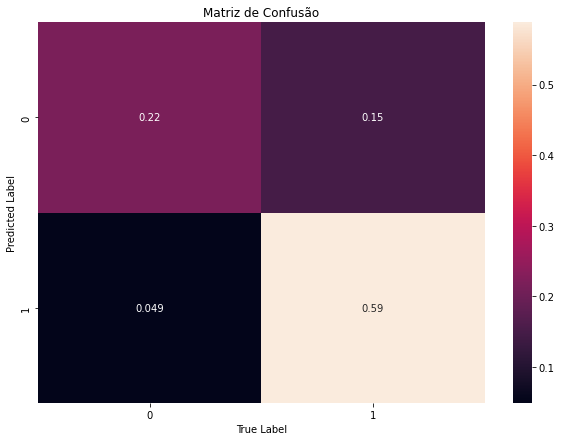

In [340]:
cm2=metrics.confusion_matrix(y_test_rf, y_pred_rf, normalize='all')
plt.figure(figsize=(10,7))
sb.heatmap(cm2, annot=True)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Matriz de Confusão')
plt.show()

In [341]:
pessoas_com_AVC = 0
total = len(y_test_rf)

for i in y_test:
    if i == 1:
        pessoas_com_AVC += 1

pessoas_sem_AVC = total - pessoas_com_AVC

percentual_com_AVC = pessoas_com_AVC/total
percentual_sem_AVC = pessoas_sem_AVC/total

print(f'Percentual de pessoas SEM AVC na base de teste: {percentual_sem_AVC.__round__(2)}')
print(f'Percentual de pessoas COM AVC na base de teste: {percentual_com_AVC.__round__(2)}')

Percentual de pessoas SEM AVC na base de teste: 0.36
Percentual de pessoas COM AVC na base de teste: 0.64


Analisando a matriz de confusão e o código acima, pode-se dizer que ela conseguiu ter um acerto de quase 60% em relação as pessoas que tinham AVC de fato, chegando perto do ideal que era de 64%, enquanto em relação a aqueles sem AVC obteve-se uma porcentagem de 22%, em que o ideal seria de 36%. Dessa forma, pode-se dizer que a nossa predição conseguiu identificar bem aqueles que já tiveram AVC, mas em relação aos que nunca tiveram teve-se cerca de 15% de diferença, o que mostra que nossa predição considerou algumas pessoas que nunca tiveram AVC como que já tiveram esse acidente (exatamente os 15% de diferença), sendo que para indíviduos que já tiveram AVC, teve poucos casos que considerou eles como se nunca tivessem o acidente (cerca de 5%).

Sendo assim, os números 0.15 e 0.049 indicados na matriz indicam os erros da predição em relação a base de teste, enquanto 0.22 e 0.59 indicam o respectivo acerto. Vale ressaltar, que estamos classificando 1 como pessoas que já tiveram AVC e 0 para as que nunca tiveram.

Portanto, a matriz ideal, seria composta com o canto superior esquerdo possuindo 36% e o canto inferior direito com 64%, ou seja, a diagonal principal teria que ter sua soma igual aos 100%, enquanto a diagonal secundária possuiria uma soma de 0%, já que é esta que indica o percentual de erro nas predições em relação a base de teste.

### Matriz de Correlação

In [342]:
features2=['age','hypertension', 'heart_disease','avg_glucose_level','bmi','stroke']

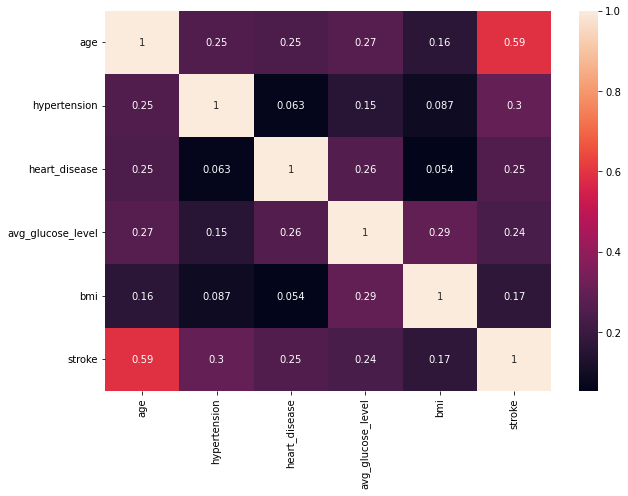

In [343]:
corre=dados_juntos[features2].corr(method='pearson')
plt.figure(figsize=(10, 7))
sb.heatmap(corre, annot=True)
plt.show()

A matriz de correlação, deixa claro quais características estão impactando mais para uma possível predição de algo. Sendo assim, como nosso objetivo é tentar entender quais os principais aspectos que levam a um perfil de pessoa propensa a sofrer um AVC, essa matriz é ótima para nós, pois conseguimos analisar o quanto cada aspecto está impactando para esse perfil. Dessa forma, fizemos para os fatores que, após a análise exploratória, consideramos mais relevantes, sendo eles: idade, hipertensão, problema cardíaco, nível de glicose no sague e o índice de massa corporal.

Dessa forma, para analisar a matriz de correlação deve-se observar a última linha ou última coluna (aquelas que possuem stroke = 1), na qual os aspectos com percentuais mais próximos de 1, são os mais relevantes.

Portanto, podemos concluir que a idade é um fator determinante para nosso perfil, seguida depois de hipertensão, problema cardíaco, nível de glicose no sague e o índice de massa corporal, possuindo percentuais semelhantes na matriz. 

## Referências Bibliográficas

[1] <a href="https://www.em.com.br/app/noticia/bem-viver/2022/04/18/interna_bem_viver,1360730/avc-e-a-segunda-causa-de-mortes-no-mundo-e-avanca-nos-paises-de-baixa-renda.shtml" target="_blank">"https://www.em.com.br/app/noticia/bem-viver/2022/04/18/interna_bem_viver,1360730/avc-e-a-segunda-causa-de-mortes-no-mundo-e-avanca-nos-paises-de-baixa-renda.shtml"</a>

[2] <a href= "https://www.uol.com.br/vivabem/noticias/redacao/2022/10/29/cresce-numero-de-brasileiros-mortos-por-acidente-vascular-cerebral.htm" target="_blank">https://www.uol.com.br/vivabem/noticias/redacao/2022/10/29/cresce-numero-de-brasileiros-mortos-por-acidente-vascular-cerebral.htm</a>

[3] <a href= "https://www.lucidchart.com/pages/pt/o-que-e-arvore-de-decisao" target="_blank">https://www.lucidchart.com/pages/pt/o-que-e-arvore-de-decisao</a>

[4] <a href="https://didatica.tech/o-que-e-e-como-funciona-o-algoritmo-randomforest/" target="_blank">https://didatica.tech/o-que-e-e-como-funciona-o-algoritmo-randomforest/</a>

[5] <a href="https://www.digitalocean.com/community/tutorials/k-nearest-neighbors-knn-in-python" taget="_blank">https://www.digitalocean.com/community/tutorials/k-nearest-neighbors-knn-in-python</a>